# Hoja de Trabajo 5

Javier Mejía, 
José Eduardo López


In [31]:
#importamos las librerías necesarias 
import simpy as sim
import numpy as np
import time 
%matplotlib inline
import matplotlib.pyplot as plt

#Seteamos en un valor específicos todos los random para trabajar la simulación
np.random.seed(1)

In [32]:
#n es el número de procesos a realizar
n = 100
#p es el número de instrucciones que soporta el cpu
p = 3
#RAM es la ram disponible
RAM = 100
#t contiene los tiempos de cada corrida
t = []
# medias y desviaciones contiene las medias y desviaciones de cada corrida
medias = []
desviaciones = []
#iteraciones son los valores por los que itera
iteraciones   = [i+1 for i in range(201)]
#procesadores es el número de cpus
procesadores = 1
#env es el enviroment
env = None

In [33]:
#Definimos una clase computadora
class Computer:
    def __init__(self, env):
        self.cpu = sim.Resource(env, capacity=procesadores) #Precesadores de la computadora
        self.ram = sim.Container(env, init=RAM, capacity=RAM) #Ram de la computadora 
        self.wait = sim.Resource(env, capacity=1) #Un procesdora en espera 

In [34]:
#definimos el nodo "new"
def new(computer,reqram):
    computer.ram.get(reqram)#pedimos el ram de la computadora 

In [35]:
#definimos el nodo "ready"
def ready(computer):
    req = computer.cpu.request()#requerimientos del cpu
    yield req #está en espera hasta que se apruebe el requerimiento
    computer.cpu.release(req)

In [36]:
#definimos el nodo "running"
def running(instrucciones):
    m = max(0, instrucciones-p) #siempre tomamos la cantidad de procesos totales menos los que puede ejecutar el programa, si ya no hay más que ejecutar se toma 0
    return m

In [37]:
#definimos los procesos
def proceso(name, env, computer):
    #Ram a utilizar
    reqram = np.random.randint(1,high = 11)
    #Instrucciones a realizar
    instrucciones = np.random.randint(1,high = 11)
    new(computer,reqram)
    ready(computer)
    while (instrucciones > 0) :
        with computer.cpu.request() as req, computer.wait.request() as w:
            #print(f'Proceso {name} instrucciones pendientes: '+ str(instrucciones)+ f' at: {env.now}')
            yield req
            computer.wait.release(w)
            instrucciones = running(instrucciones)
            yield env.timeout(1)
            n = np.random.randint(1,3)
            if instrucciones == 0:
                computer.ram.put(reqram)
                #print(f'Proceso {name} terminado at: {env.now}')
            else:
                if n<2:
                    yield w
                    #print(f'Proceso {name} en espera at: {env.now}')
                else:
                    ready(computer)
            computer.cpu.release(req)
        

In [38]:
#definimos el generador de procesos con tiempo exponencial
def process_generator(env, computer):
    for i in range(n):
        env.process(proceso(i, env, computer)) #creamos un proceso en el ambiente y la clase comptuadora 
        yield env.timeout(np.random.exponential(1/10)) #el tiempo con una distribución exponencial como se indica

In [39]:
#definimos las pruebas de los procesos 
def prueba(numprocesos,memram):
    medias = []
    global p
    p = numprocesos
    global RAM
    RAM = memram
    for i in iteraciones:
        global n
        n = i
        global t
        t = []
        global env
        env = sim.Environment()
        computer = Computer(env) #creamos un objeto computadora
        process_gen = env.process(process_generator(env, computer)) #generamos procesos
        env.run() #corremos el ambiente
        medias.append(env.now/n) #guardamos los tiempos medios
    return medias

# Resultados y Gráficas 

El tiempo promedio es de:  5.508483533869628
La desviación estándar es de:  0.5153871243244104


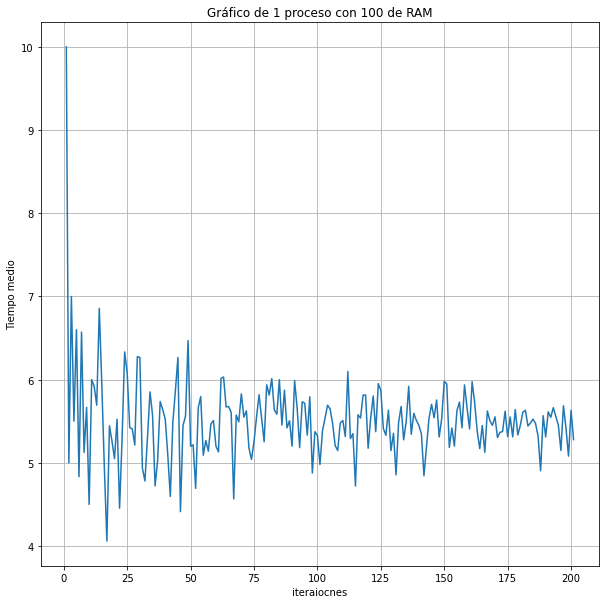

In [40]:
medias = prueba(1,100)
desviaciones = prueba(1,100)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title("Gráfico de 1 proceso con 100 de RAM")
plt.grid()
plt.ylabel("Tiempo medio")
plt.xlabel("iteraiocnes")
ax.plot(iteraciones, medias)

print("El tiempo promedio es de: ", np.mean(medias))
print("La desviación estándar es de: ", np.std(medias))

El tiempo promedio es de:  2.219620710966234
La desviación estándar es de:  0.20440447640827086


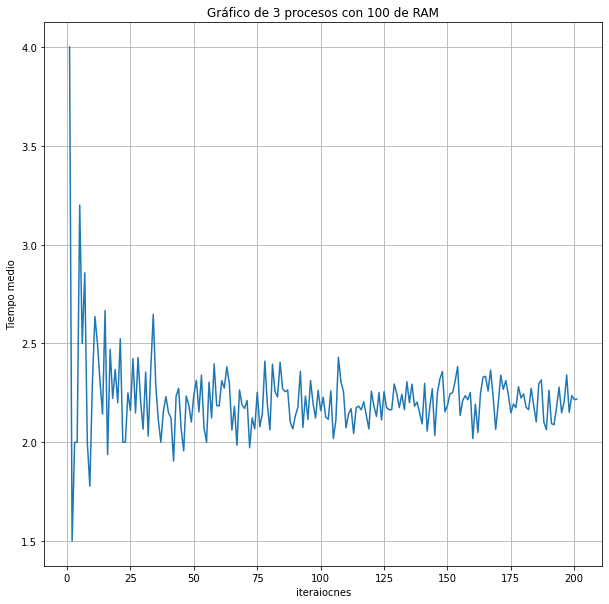

In [41]:
medias = prueba(3,100)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title("Gráfico de 3 procesos con 100 de RAM")
plt.grid()
plt.ylabel("Tiempo medio")
plt.xlabel("iteraiocnes")
ax.plot(iteraciones, medias)

print("El tiempo promedio es de: ", np.mean(medias))
print("La desviación estándar es de: ", np.std(medias))

El tiempo promedio es de:  1.501523038456942
La desviación estándar es de:  0.07451543829145352


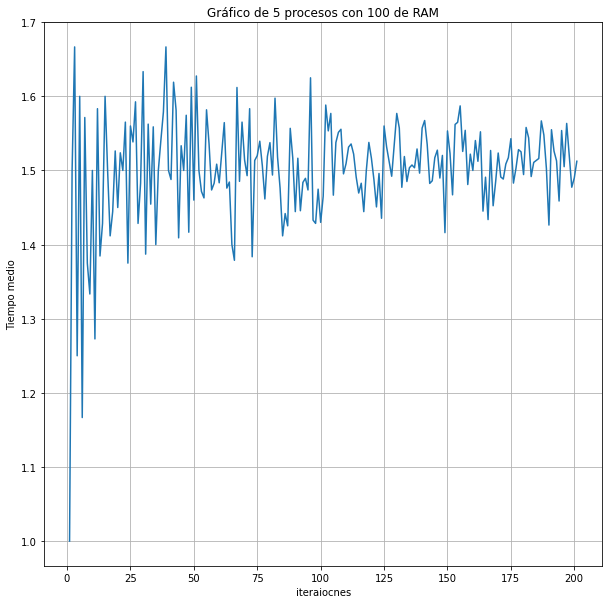

In [42]:
medias = prueba(5,100)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title("Gráfico de 5 procesos con 100 de RAM")
plt.grid()
plt.ylabel("Tiempo medio")
plt.xlabel("iteraiocnes")
ax.plot(iteraciones, medias)

print("El tiempo promedio es de: ", np.mean(medias))
print("La desviación estándar es de: ", np.std(medias))

El tiempo promedio es de:  2.190255786870392
La desviación estándar es de:  0.15866736681184296


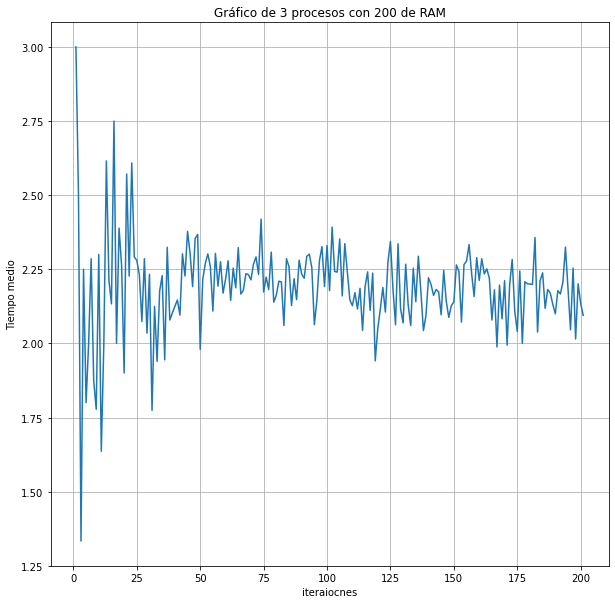

In [43]:
medias = prueba(3,200)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title("Gráfico de 3 procesos con 200 de RAM")
plt.grid()
plt.ylabel("Tiempo medio")
plt.xlabel("iteraiocnes")
ax.plot(iteraciones, medias)

print("El tiempo promedio es de: ", np.mean(medias))
print("La desviación estándar es de: ", np.std(medias))

El tiempo promedio es de:  1.4003380832609753
La desviación estándar es de:  0.07990826999475185


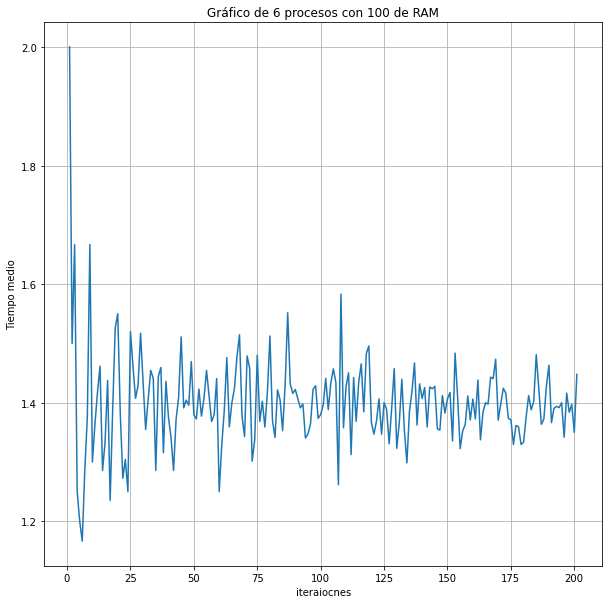

In [44]:
medias = prueba(6,100)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title("Gráfico de 6 procesos con 100 de RAM")
plt.grid()
plt.ylabel("Tiempo medio")
plt.xlabel("iteraiocnes")
ax.plot(iteraciones, medias)

print("El tiempo promedio es de: ", np.mean(medias))
print("La desviación estándar es de: ", np.std(medias))

El tiempo promedio es de:  1.1270866430264337
La desviación estándar es de:  0.1629956704601792


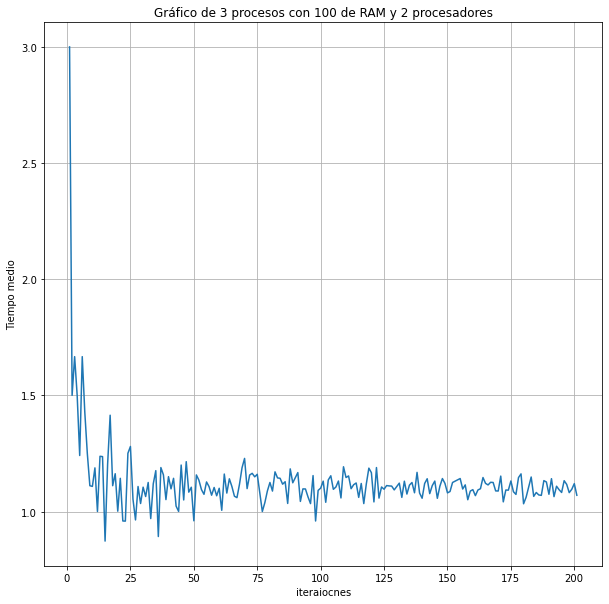

In [45]:
procesadores = 2
medias = prueba(3,100)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title("Gráfico de 3 procesos con 100 de RAM y 2 procesadores")
plt.grid()
plt.ylabel("Tiempo medio")
plt.xlabel("iteraiocnes")
ax.plot(iteraciones, medias)
print("El tiempo promedio es de: ", np.mean(medias))
print("La desviación estándar es de: ", np.std(medias))

Considerando que los tiempos promedio más bajos están en el caso con 2 procesadores, la mejor estrategia para disminuir el tiempo es aumentar el número de procesadores, seguido de aumentar el número de instrucciones que soporta el procesador, y por último la capacidad de la memoria RAM. Esto se peude corroborar el tiempo promedio de cada una de las gráficas que ordenadas de menor a mayor son :

1) 2 procesadores con 3 procesos y 100 de RAM: 1.28 ms

2) 1 procesador con 6 procesos y 100 de RAM: 1.40 ms

5) 1 procesador con 5 procesos y 100 de RAM: 1.50 ms

4) 1 procesador con 3 procesos y 200 de RAM: 2.20 ms

5) 1 procesador con 3 procesos y 100 de RAM: 2.22 ms

6) 1 procesdaor con 1 proceso y 100 de RAM: 5.50 ms